In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy.interpolate import griddata
import cartopy.crs as ccrs


In [2]:
home_folder = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/'
# we need to coordinates file to access the corner points - glamf/gphif
model_mask_file = home_folder + 'GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values[:,0,:,:]

In [3]:
left_lon = 5
right_lon = 21
top_lat = -15
bottom_lat = -40

delta = 0.0625
# delta = 0.25

lons = np.arange(left_lon, right_lon + delta, delta)
lats = np.arange(bottom_lat, top_lat + delta, delta)
regions_lons, regions_lats = np.meshgrid(lons, lats)
print(regions_lons.shape)

(401, 257)


In [11]:
points = list(zip(regions_lons.flatten(), regions_lats.flatten()))
release_lons, release_lats = zip(*points)

In [10]:
len(longitudes)

103057

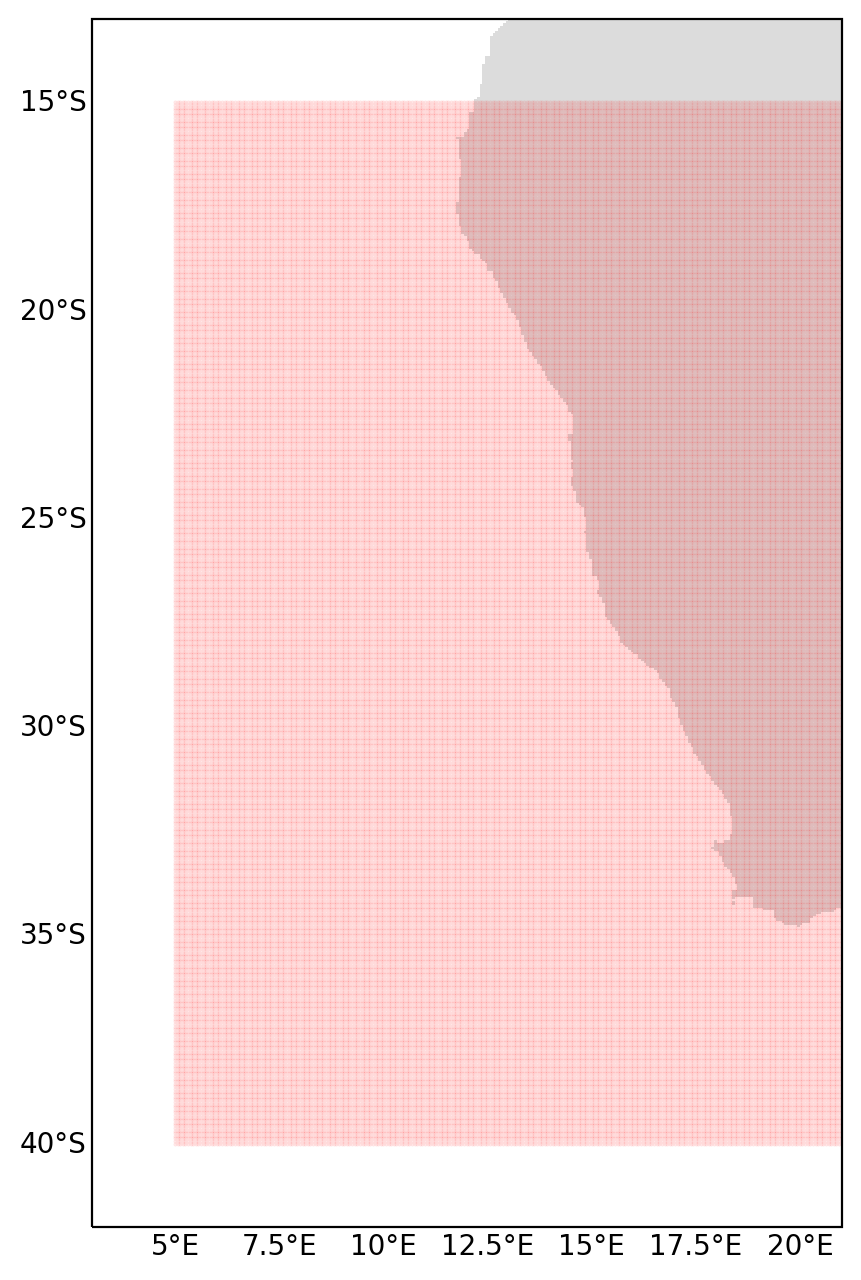

In [12]:
custom_size=10

fig = plt.figure(figsize=(12,8),dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}

colormap = clr.ListedColormap(['gainsboro', 'white'])
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 1250:1750, 1500:], cmap=colormap)
ax.scatter(release_lons, release_lats, c='red', s=0.2, alpha=0.1)
ax.set_xlim(3,21)
ax.set_ylim(-42,-13)

plt.show()

Using full matrix (**FULLm**) for ease of FTLE computation- needs 2D grid with defined corners and not coastline. 

In [14]:
np.savez_compressed('/nethome/manra003/analysis/dispersion/Benguela_0625_401x257_release_points.npz',
                    Longitude=release_lons,
                    Latitude=release_lats)

No need to remove land points

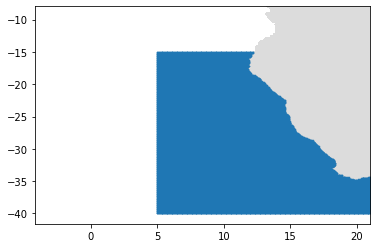

In [5]:
land_val_release = griddata((mask_lon.ravel(), mask_lat.ravel()), mask_land.ravel(),
                            (regions_lons, regions_lats), method='linear', fill_value=0)
bool_mask = land_val_release.astype(bool)

fig = plt.figure()
ax = plt.axes()
colormap = clr.ListedColormap(['gainsboro', 'white'])

# Near Amazon river- 4-5 month simulations
ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0, 1250:1750, 1500:], cmap=colormap)


release_lons = regions_lons[bool_mask]
release_lats = regions_lats[bool_mask]

ax.scatter(release_lons, release_lats, s=0.3)
plt.show()

In [21]:
print(len(release_lons)) #120579
print((regions_lats.shape))
release_lons.shape

72955
(401, 257)


(72955,)